# **9. countplot**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.style.use('seaborn')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Paperlogy'

In [2]:
import numpy as np
import pandas as pd
 
n = 1000
 
# 기본 능력치 생성 (학생들의 전반적인 학습 능력)
base_ability = np.random.normal(0, 1, size=n)
physical_ability = np.random.normal(0, 1, size=n)  # 체육 능력 추가
 
# 과목별 점수 생성
국어 = 75 + 10 * (0.7 * base_ability + 0.3 * np.random.normal(0, 1, size=n))
영어 = 72 + 12 * (0.6 * base_ability + 0.4 * np.random.normal(0, 1, size=n))
수학 = 70 + 15 * (0.8 * base_ability + 0.2 * np.random.normal(0, 1, size=n))
# 체육은 수학과 반비례하도록 -base_ability 사용
체육 = 80 + 8 * (-0.6 * base_ability + 0.8 * physical_ability + 0.2 * np.random.normal(0, 1, size=n))
 
# 점수 범위 조정 및 반올림
data = {
    '국어': np.round(np.clip(국어, 50, 100), 1),
    '영어': np.round(np.clip(영어, 50, 100), 1),
    '수학': np.round(np.clip(수학, 50, 100), 1),
    '체육': np.round(np.clip(체육, 50, 100), 1),
    '성별': np.random.choice(['남', '여'], size=n),
    '반': np.random.choice([f'{i}반' for i in range(1,10)], size=n)
}
 
df = pd.DataFrame(data)

## **1. countplot 기본**
* x에 값을 지정해주지 않으면 warning messege가 나온다.

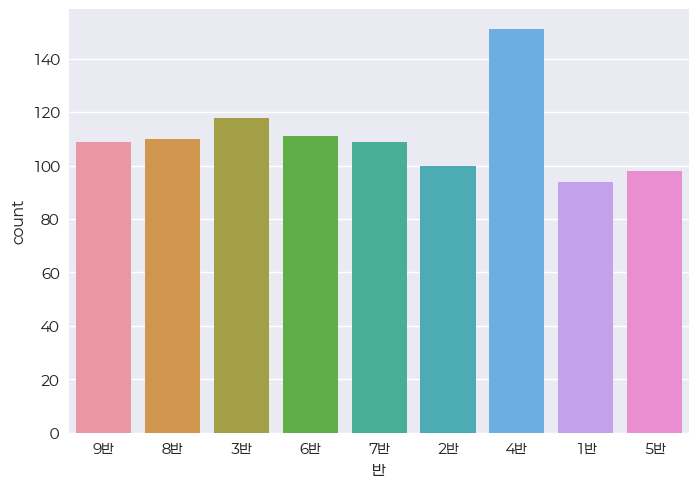

In [3]:
sns.countplot(data=df, x='반')
plt.show()

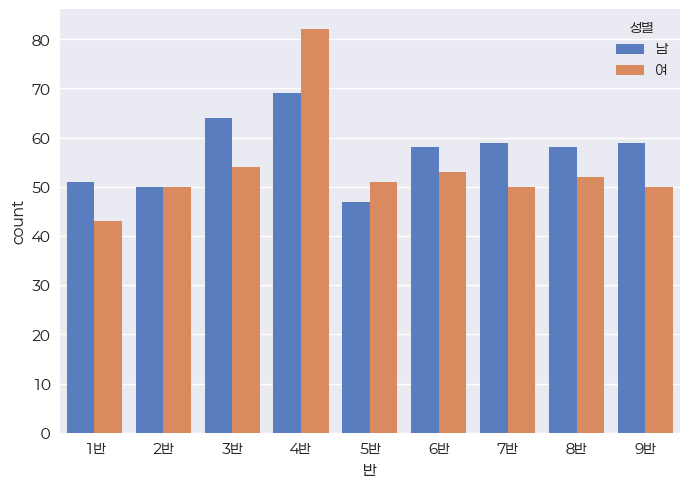

In [4]:
sns.countplot(data=df, x='반', order=[f'{i}반' for i in range(1,10)],
              hue='성별', palette='muted')
plt.show()

## **2. countplot 스타일링**

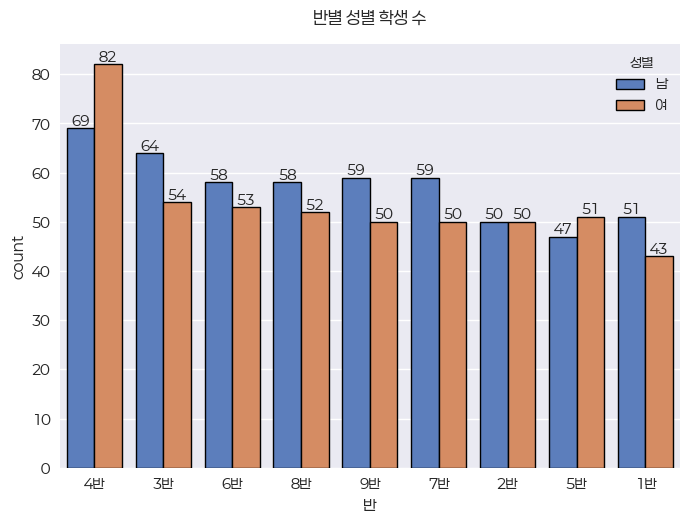

In [5]:
sns.countplot(
    # 기본 데이터 설정: 데이터프레임 / X축(범주) / 색상구분 / 정렬순서 (df['반'].value_counts().index)
    data=df, x='반', hue='성별', order=df['반'].value_counts().index,
    
    # 스타일 설정: 팔레트 / 채도
    palette='muted', saturation=0.7,
    
    # 막대 설정: 너비 / 테두리색 / 테두리두께
    width=0.8, edgecolor='black', linewidth=1
)
 
# 막대 위에 숫자 표시
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width()/2, p.get_height()),
                      ha='center', va='bottom')
 
plt.title('반별 성별 학생 수', pad=15)
plt.show()

## **3. countplot snippet**

In [6]:
# "Seaborn Countplot Template": {
#     "prefix": "sns_countplot",
#     "body": [
#         "fig, ax = plt.subplots(figsize=(10,6))",
#         "count_plot = sns.countplot(",
#         "    # 1. 기본 데이터 설정: 데이터프레임 / X축(범주) / 색상구분 / 정렬순서 (${1:df['col1'].value_counts().index})",
#         "    data=${2:df}, x='${3:col1}', hue='${4:col2}', order=${5:df['col1'].value_counts().index},",
#         "",
#         "    # 2. 스타일 설정: 팔레트 / 채도",
#         "    palette='${6:muted}', saturation=${7:0.7},",
#         "",
#         "    # 3. 막대 설정: 너비 / 테두리색 / 테두리두께",
#         "    width=${8:0.8}, edgecolor='${9:black}', linewidth=${10:1}",
#         ")",
#         "",
#         "# 4. 타이틀 및 범례 설정",
#         "ax.set_title('${11:Count Plot}', fontsize=${12:16})",
#         "ax.legend(title='${13:Legend}', loc='upper right', bbox_to_anchor=(1, 1))",
#         "plt.show()"
#     ],
#     "description": "Create a Seaborn countplot with title and customized legend"
# }